# Load the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# You can find the data under https://drive.google.com/drive/folders/1e550az93U3_kfRBbVY5PZnMKYwGYmHqi?usp=sharing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
%matplotlib inline

path = "/content/drive/My Drive"
filename1 = "train_data.csv"

train_data = pd.read_csv(join(path, filename1))

filename2 = "train_label.csv"

train_label = pd.read_csv(join(path, filename2))

filename3 = "test_data.csv"

test_data = pd.read_csv(join(path, filename3))


filename4 = "test_label.csv"

test_label = pd.read_csv(join(path, filename4))





In [46]:
# show random samples from the training data
train_data
# One line of code

,id,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,f_worker,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car,savings_status_500<=X<1000,savings_status_<100,savings_status_>=1000,savings_status_no known savings,employment_4<=X<7,employment_<1,employment_>=7,employment_unemployed,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_guarantor,other_parties_none,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_yes
0,1,6,1169,4,4,67,2,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1
1,2,48,5951,2,2,22,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0
2,3,12,2096,2,3,49,1,2,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0
3,4,42,7882,2,4,45,1,2,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0
4,5,24,4870,3,4,53,2,2,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,789,48,6224,4,4,50,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0
789,790,40,5998,4,3,27,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1
790,791,21,1188,2,4,39,1,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0
791,792,24,6313,3,4,41,1,2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1


# Train Decision Tree with default parameters

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree



# Train decision tree using the whole training data with **entropy** criteria

# One line of code
tre=DecisionTreeClassifier(criterion='entropy')
# One line of code
tre = tre.fit(train_data , train_label)


# Estimate the prediction of test data
test_pred = tre.predict(test_data) # One line of code

# Calculate accuracy of test data
from sklearn.metrics import accuracy_score
TestAcc = accuracy_score(test_label, test_pred)# One line of code
print("Testing Accuracy = %.5f%%" % (TestAcc * 100))

Testing Accuracy = 67.63285%


# FineTune Decision Tree parameters

1- Spliting dataset into train and validation 

In [0]:
# Split training data to 70% training and 30% validation
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_data, train_label, test_size=0.3)# One line of code

2- FineTune minimum sample split

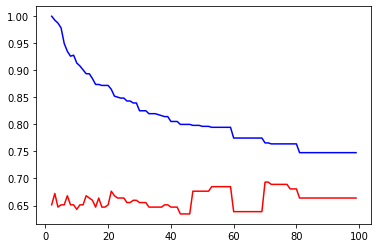

In [49]:
min_samples_splits = range(2, 100)

train_results = []
val_results = []
for min_samples_split in min_samples_splits:
  
  # Fit the tree using the 70% portion of the training data
  # One line of code
  dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
  # One line of code
  dt.fit(x_train, y_train)
  
  # Evaluate on Training set
  train_pred = dt.predict(x_train)# One line of code
  train_acc = accuracy_score(y_train, train_pred)# One line of code
  train_results.append(train_acc)
   
  # Evaluate on Validation set
  val_pred = dt.predict(x_val)# One line of code
  val_acc = accuracy_score(y_val , val_pred  )# One line of code
  val_results.append(val_acc)
  
# Ploting
import matplotlib.pyplot as plt

plt.plot(min_samples_splits, train_results, 'b')
plt.plot(min_samples_splits, val_results,'r')
plt.show()

In [50]:
# Choose the best minimum split sample based on the plot
max_val_results = max(val_results)
Best_minSampl = min_samples_splits[val_results.index(max_val_results)]  # One line of code


# Train decision tree using the full training data and the best minimum split sample
# One line of code
tree_dt = DecisionTreeClassifier(min_samples_split=Best_minSampl)
# One line of code
tree_dt.fit(train_data , train_label)

# Estimate the prediction of the test data
test_pred = tree_dt.predict(test_data)# One line of code

# Calculate accuracy of test data
TestAcc = accuracy_score(test_label, test_pred)# One line of code
print("Testing Accuracy = %.5f%%" % (TestAcc * 100))

Testing Accuracy = 70.53140%


# Now, apply the same procedure but using KNN instead of decision tree 

# For finetuning, find the best value of K to use with this dataset.

In [51]:
# Write your code here

from sklearn.neighbors import KNeighborsClassifier

# initialize the values of k to be a list of odd numbers between 1 and 30
kVals = range(1, 30, 2)

# Save the accuracies of each value of kVal in [accuracies] variable
# hint: you can use accuracies.append(...) function inside the loop
accuracies = []

# loop over values of k for the k-Nearest Neighbor classifier
for k in kVals:
  # Follow what we did in decision tree part
  model = KNeighborsClassifier( n_neighbors = k)
  model.fit(x_train, y_train.label.ravel())

  score = model.score(x_val, y_val)
  #print("For k = %d, validation accuracy = %.5f%%" % (k, score * 100))
  # Update the accuracies list
  accuracies.append(score)

# Train KNN using the full training data with the best K that you found
i = np.argmax(accuracies)
print("best k = %d with %.5f%% validation accuracy" % (kVals[i], accuracies[i] * 100))


model = KNeighborsClassifier( n_neighbors=kVals[i])
model.fit(train_data , train_label)

# Testing
test_pred = model.predict(test_data)
TestAccuracy = accuracy_score(test_label, test_pred)
print("Testing Accuracy = %.5f%%" % (TestAccuracy * 100))



best k = 25 with 71.42857% validation accuracy
Testing Accuracy = 70.04831%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


# Bonus

# Apply gridsearch using decision tree on any hyperparameter(s) of your choice, you have to beat your previous obtained accuracies to get the bonus


In [65]:
# Write your code here
from sklearn import tree
from sklearn.model_selection import GridSearchCV

parameters={'max_leaf_nodes': list(range(2, 100))}
clf_tree=tree.DecisionTreeClassifier()
#clf=grid_search.GridSearchCV(clf_tree,parameters)
clf = GridSearchCV(clf_tree, parameters)
clf.fit(train_data,train_label)

print("best max leaf nodes:" ,  clf.best_estimator_.get_params()['max_leaf_nodes'] )

clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=  clf.best_estimator_.get_params()['max_leaf_nodes'])

clf_tree.fit(train_data , train_label)

test_pred = clf_tree.predict(test_data)# One line of code

# Calculate accuracy of test data
TestAcc = accuracy_score(test_label, test_pred)# One line of code
print("Testing Accuracy = %.5f%%" % (TestAcc * 100))


best max leaf nodes: 15
Testing Accuracy = 73.42995%


# Report: Write a summary of your approach to this problem; this should be like an abstract of a paper or the executive summary (you aim for clarity and passing on information, not going to details about known facts such as what decision trees are, assuming they are known to people in your research area).

Must include statements such as:


*   Include the problem definition: 1-2 lines
*   Talk about train/val/test sets, size and how split.
*   State what your test results are with the chosen method, parameters: e.g. "We have obtained the best results with the ….. classifier (parameters=....) , giving classification accuracy of …% on test data…."
*   Comment on the speed of the algorithms and anything else that you deem important/interesting (e.g. confusion matrix)



# Write your report in this cell
The dataset contains information about clients of a German Bank. Each entry is a person with its attributes. And each person has a label indicating whether a person good(not risky) or bad(risky).  For training and testing my machine learning models, we have to datasets. Firstly, for training, we have 793 entries.  Secondly for the test, we have 207 entries. 
Then, I use the Decision Tree algorithm with default parameters. My testing accuracy is 67.63285%.  Then I split the training data to %70 train data and %30 validation data. Then I test the training data with 'min_sample_splits'. The parameters range is from 2 to 100. And I tune every number in this range to find the best accuracy score in the validation set. And then I took that the best 'min_sample_split' and use it as a parameter before fit data. The testing accuracy becomes 70.53140%.
After I use KNeighborsClassifier. I tune the values of k odd numbers between 1 and 30. I find the best k parameter as 25.  Using k=25 gives 70.04831% testing accuracy. Then I use the gridsearch to improve the test accuracy. I choose 'max_leaf_nodes' as the hyperparameter. The best 'max_leaf_nodes' parameter is 15. When I tune it, testing accuracy 73.42995%.  
..

..

..
